# Harry potter books series cloud Jubyter 

## Imports

In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read dataset 

In [2]:
df = pd.read_csv('books.csv')
df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
4,12,13335037,13335037,13155899,210,62024035,9.780062e+12,Veronica Roth,2011.0,Divergent,...,1903563,2216814,101023,36315,82870,310297,673028,1114304,https://images.gr-assets.com/books/1328559506m...,https://images.gr-assets.com/books/1328559506s...


## Data cleaning & Preprocessing 

### Handling Missing Values

In [3]:
# Check for missing values
print(df.isnull().sum())

# Check the data types of columns
print(df.dtypes)

book_id                        0
goodreads_book_id              0
best_book_id                   0
work_id                        0
books_count                    0
isbn                          52
isbn13                        44
authors                        0
original_publication_year      3
original_title                52
title                          0
language_code                109
average_rating                 0
ratings_count                  0
work_ratings_count             0
work_text_reviews_count        0
ratings_1                      0
ratings_2                      0
ratings_3                      0
ratings_4                      0
ratings_5                      0
image_url                      0
small_image_url                0
dtype: int64
book_id                        int64
goodreads_book_id              int64
best_book_id                   int64
work_id                        int64
books_count                    int64
isbn                          object
isbn13

In [4]:
# Drop rows with missing values
df.dropna(inplace=True)

In [5]:
# Check for missing values after deletion 
print(df.isnull().sum())

book_id                      0
goodreads_book_id            0
best_book_id                 0
work_id                      0
books_count                  0
isbn                         0
isbn13                       0
authors                      0
original_publication_year    0
original_title               0
title                        0
language_code                0
average_rating               0
ratings_count                0
work_ratings_count           0
work_text_reviews_count      0
ratings_1                    0
ratings_2                    0
ratings_3                    0
ratings_4                    0
ratings_5                    0
image_url                    0
small_image_url              0
dtype: int64


### Remove Duplicates  

In [6]:
# Cheak for duplicates 
duplicates = df[df.duplicated()]

# Display the duplicates 
print("Duplicate rows:")
print(duplicates)

Duplicate rows:
Empty DataFrame
Columns: [book_id, goodreads_book_id, best_book_id, work_id, books_count, isbn, isbn13, authors, original_publication_year, original_title, title, language_code, average_rating, ratings_count, work_ratings_count, work_text_reviews_count, ratings_1, ratings_2, ratings_3, ratings_4, ratings_5, image_url, small_image_url]
Index: []

[0 rows x 23 columns]


In [7]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Print the shape of the DataFrame after removing duplicates to see how many duplicates were removed
print("Shape of DataFrame after removing duplicates:", df.shape)

Shape of DataFrame after removing duplicates: (1153, 23)


## Extract a harry potter serices 

In [8]:
# get Harry Potter books written by J.K. Rowling
authors = df.authors.unique()
jkr = [i for i in authors if i.find('J.K. Rowling') != -1]
jkr_books = df.loc[df.authors.isin(jkr)]
all_titles = jkr_books.title.unique()
hp_titles = [i for i in all_titles if i.find('Harry Potter and ') != -1]
hp_books = jkr_books.loc[jkr_books.title.isin(hp_titles)]
hp_books = hp_books.sort_values(by=['original_publication_year'], ascending=True)
hp_books

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
9,23,15881,15881,6231171,398,439064864,9.780439e+12,"J.K. Rowling, Mary GrandPré",1998.0,Harry Potter and the Chamber of Secrets,...,1779331,1906199,34172,8253,42251,242345,548266,1065084,https://images.gr-assets.com/books/1474169725m...,https://images.gr-assets.com/books/1474169725s...
6,18,5,5,2402163,376,043965548X,9.780440e+12,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,Harry Potter and the Prisoner of Azkaban,...,1832823,1969375,36099,6716,20413,166129,509447,1266670,https://images.gr-assets.com/books/1499277281m...,https://images.gr-assets.com/books/1499277281s...
10,24,6,6,3046572,332,439139600,9.780439e+12,"J.K. Rowling, Mary GrandPré",2000.0,Harry Potter and the Goblet of Fire,...,1753043,1868642,31084,6676,20210,151785,494926,1195045,https://images.gr-assets.com/books/1361482611m...,https://images.gr-assets.com/books/1361482611s...
8,21,2,2,2809203,307,439358078,9.780439e+12,"J.K. Rowling, Mary GrandPré",2003.0,Harry Potter and the Order of the Phoenix,...,1735368,1840548,28685,9528,31577,180210,494427,1124806,https://images.gr-assets.com/books/1387141547m...,https://images.gr-assets.com/books/1387141547s...
12,27,1,1,41335427,275,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
11,25,136251,136251,2963218,263,545010225,9.780545e+12,"J.K. Rowling, Mary GrandPré",2007.0,Harry Potter and the Deathly Hallows,...,1746574,1847395,51942,9363,22245,113646,383914,1318227,https://images.gr-assets.com/books/1474171184m...,https://images.gr-assets.com/books/1474171184s...


### Find the most selling books within the Harry Potter series.

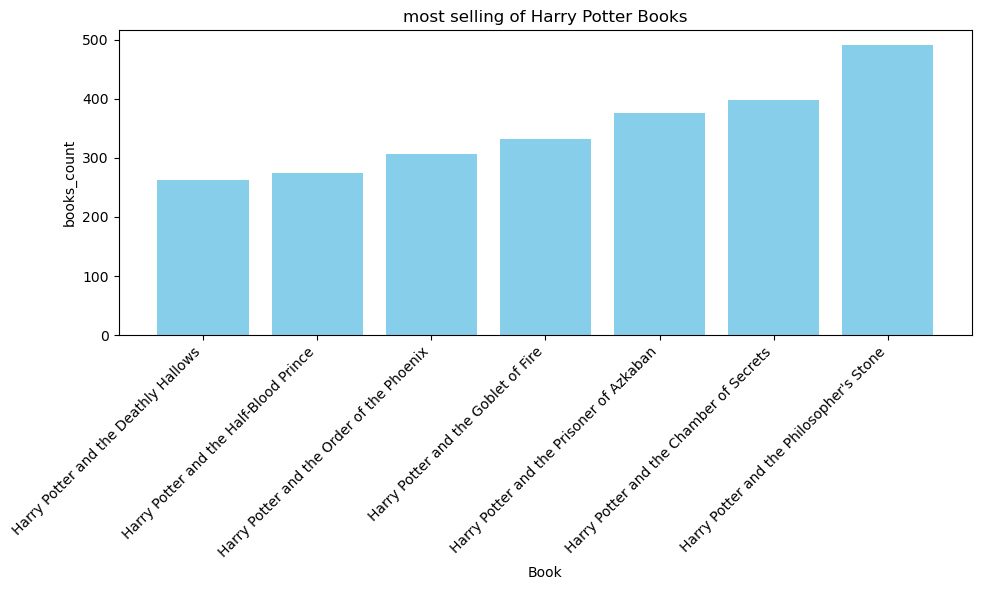

In [14]:
# Sort the DataFrame by books_count to detecte the most selling 
hp_books.sort_values(by='books_count', inplace=True)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(hp_books['original_title'], hp_books['books_count'], color='skyblue')
plt.xlabel('Book')
plt.ylabel('books_count')
plt.title('most selling of Harry Potter Books')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

### Average rating of harry potter serices 

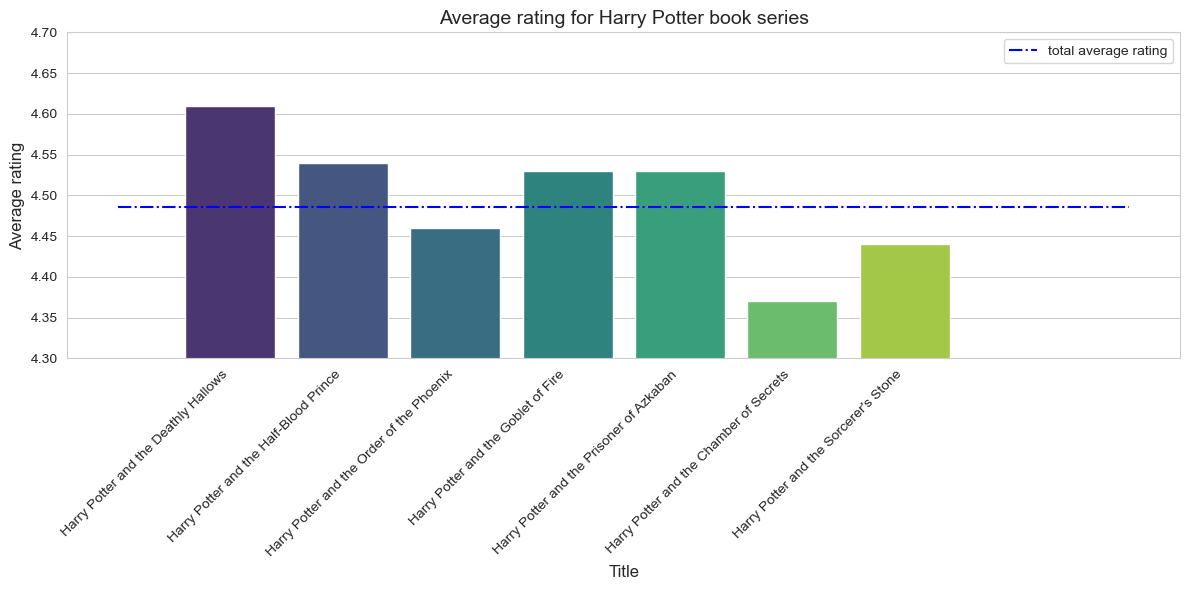

In [18]:
titles = hp_books.title.tolist()
titles = [title[:title.find(' (')] for title in titles]

weighted_avg = (hp_books.average_rating * hp_books.ratings_count).sum() / hp_books.ratings_count.sum()

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=titles, y=hp_books.average_rating, palette="viridis")
plt.xlabel('Title', fontsize=12)
plt.ylabel('Average rating', fontsize=12)
plt.ylim((4.3, 4.7))
plt.hlines(weighted_avg, xmin=-1, xmax=8, color='blue', linestyles='dashdot', label='total average rating')
plt.title('Average rating for Harry Potter book series', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.show()

In [19]:
print(weighted_avg)

4.486117244334694
